# CSCI 431 - Assignment 1:

**Name:** Chellissa Johnson  
**Dataset:** Kaggle Titanic   

**Objective:**  
To analyze the Titanic dataset, visualize the data, perform ETL, fit the dataset to a model and analyze the results.

In [10]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [11]:
train_df = pd.read_csv("train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
## Data Summary

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


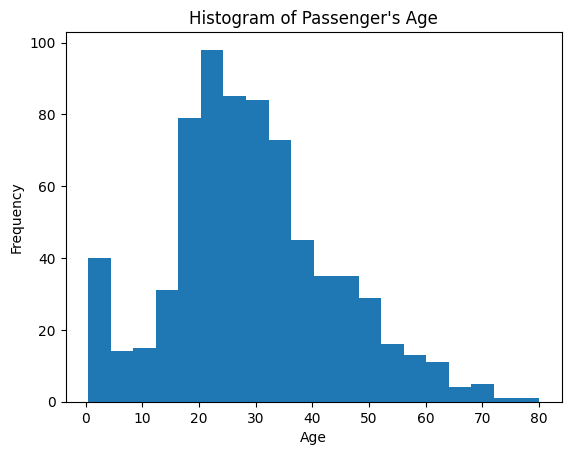

In [14]:
## Histogram

import matplotlib.pyplot as plt

plt.hist(train_df["Age"].dropna(), bins=20)
plt.title("Histogram of Passenger's Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [23]:
## Standard Deviation

train_df.select_dtypes(include="number").std()

,0
PassengerId,257.353842
Survived,0.486592
Pclass,0.836071
Age,14.526497
SibSp,1.102743
Parch,0.806057
Fare,49.693429


## Perform ETL

Selected relevant features, handled missing values: age, and encoded categorical variables: sex.

In [15]:
df = train_df[["Survived", "Pclass", "Sex", "Age", "Fare"]].copy()

# Handle missing values
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Fare"] = df["Fare"].fillna(df["Fare"].median())

# Encode categorical variable
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500


## Define Features (X) and Target Variable (y)

This is a supervised, classification model, where the dataset is split into features (X) and a target variable (y).
X contains the input variables used to make predictions, and y contains the output variable (Survived).

In [16]:
X = df[["Pclass", "Sex", "Age", "Fare"]]
y = df["Survived"]

In [17]:
X.head(), y.head()

(   Pclass  Sex   Age     Fare
 0       3    0  22.0   7.2500
 1       1    1  38.0  71.2833
 2       3    1  26.0   7.9250
 3       1    1  35.0  53.1000
 4       3    0  35.0   8.0500,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int64)

## Model – Support Vector Machine (SVM) in Python
This is a supervised classification model used to predict survival (yes/no).

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
model = SVC(kernel="linear", random_state=42)
model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [21]:
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7821229050279329

In [22]:
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7821229050279329

Confusion Matrix:
 [[88 17]
 [22 52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

